In [3]:
import numpy as np
import matplotlib
import pandas as pd


dataset = pd.read_csv('/Users/wzhang/Downloads/lake_erie_habs_W4_6_8_9_12_13_16_2013-2020.xlsx - HAB_data (1).csv')

labels = dataset.iloc[:,16:].values

vals = pd.DataFrame(dataset.iloc[:,4:15].values)

from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test = train_test_split(vals,labels,test_size=0.2,random_state=0)
X_train = np.array(X_train)


In [16]:
features = pd.DataFrame(dataset.iloc[:,4:15])
features = features.columns
print(features)

Index(['Secchi Depth (m)', 'CTD Temperature (°C)',
       'CTD Specific Conductivity (µS/cm)', 'CTD Dissolved Oxygen (mg/L)',
       'Turbidity (NTU)', 'Total Phosphorus (µg P/L)',
       'Total Dissolved Phosphorus (µg P/L)', 'Ammonia (µg N/L)',
       'Nitrate + Nitrite (mg N/L)', 'Particulate Organic Carbon (mg/L)',
       'Particulate Organic Nitrogen (mg/L)'],
      dtype='object')


In [4]:
from keras.models import Sequential, Model
from tensorflow.keras.layers import LSTM, Dropout, Dense, BatchNormalization, GRU, LayerNormalization, MultiHeadAttention,TimeDistributed, Input, Flatten
from sklearn.ensemble import RandomForestRegressor

2024-06-27 09:32:54.582825: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [5]:
# Initialize Random Forest regressor
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)

# Train the model
rf_model.fit(X_train, Y_train)




/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


RandomForestRegressor(random_state=42)

In [6]:
res = rf_model.predict(X_test)
res.reshape(168,1)
print(res)
print(res.shape)

[  4.6806 390.0607   6.8566  51.5994   8.2189  87.4632  29.6246  59.4418
  12.3114   7.586   45.0589 150.2194   3.3048  15.33     5.9419  10.4138
   3.4835   3.6209   8.1154  83.5129  39.5986   2.7422   9.3881   3.4071
  15.2897   8.868   31.0679   9.8672  86.382    8.2177  13.8426   5.2597
  30.7713  49.0462  44.1267  11.2746  18.5544   9.1652  12.6921  15.159
   9.3099  17.9907  10.1099   2.7844   2.7209   7.1072  21.5058  15.1281
   3.631    1.9943  23.7183  17.1396 180.1294  63.6095  33.5286  16.5025
  27.9172  12.1646  20.4043   4.0908   2.7225   2.6843  41.221   21.0053
   8.0261  48.9131   8.2605   7.8626  49.6364  91.0728   8.4709   2.6516
  52.4976  23.8447  50.3907   2.3638  69.191    4.198   22.8975   2.2014
  17.431    2.2193  10.5259  10.8019  24.8134   4.3805   3.3155   2.6446
  53.3208  33.3307  77.0893  18.9687   5.5128   4.9168  34.4941  96.4728
  12.8253  17.6501  16.599    7.6174   4.5461  41.5775  43.7055  10.0391
   4.301   15.1951  14.6831  31.9754 107.0909   6.07

In [7]:
print(Y_test)

[[  0.77]
 [466.5 ]
 [  1.73]
 [ 48.64]
 [  6.82]
 [ 88.48]
 [  4.25]
 [ 48.44]
 [ 11.6 ]
 [  7.92]
 [ 43.53]
 [150.15]
 [  2.48]
 [ 14.1 ]
 [  3.86]
 [ 16.17]
 [  4.18]
 [  3.76]
 [  8.03]
 [ 70.2 ]
 [ 41.66]
 [  2.18]
 [  8.24]
 [  3.43]
 [ 26.8 ]
 [  8.65]
 [ 36.61]
 [  9.98]
 [190.08]
 [  5.48]
 [ 12.9 ]
 [  6.27]
 [ 39.44]
 [ 17.29]
 [ 42.47]
 [ 14.92]
 [ 26.3 ]
 [  4.29]
 [ 14.61]
 [  8.81]
 [  8.29]
 [ 18.52]
 [ 12.25]
 [  3.04]
 [  3.75]
 [  7.93]
 [ 37.75]
 [ 11.42]
 [  3.3 ]
 [  2.68]
 [ 32.91]
 [ 15.27]
 [183.42]
 [ 66.79]
 [ 44.48]
 [ 22.69]
 [ 23.99]
 [  7.46]
 [ 20.45]
 [  5.11]
 [  1.65]
 [  2.06]
 [ 29.12]
 [ 22.62]
 [  1.46]
 [ 54.02]
 [  3.97]
 [  6.98]
 [ 52.11]
 [119.72]
 [ 14.61]
 [  1.93]
 [ 50.96]
 [ 16.  ]
 [ 53.09]
 [  1.74]
 [ 44.09]
 [  3.56]
 [ 35.53]
 [  1.14]
 [ 24.77]
 [  3.91]
 [ 21.67]
 [  9.97]
 [ 41.47]
 [  6.36]
 [  3.56]
 [  2.8 ]
 [ 47.71]
 [ 30.07]
 [ 60.26]
 [ 17.85]
 [  1.63]
 [  2.06]
 [ 25.53]
 [ 89.16]
 [  3.59]
 [ 17.4 ]
 [ 16.26]
 [  6.61]


In [8]:
from sklearn.metrics import r2_score 
r2 = r2_score(Y_test, res) 
print(r2)

0.9179118086389214


In [9]:
from sklearn.metrics import mean_absolute_error
mae = mean_absolute_error(Y_test,res)
print(mae)

7.625435714285716


In [10]:
from sklearn.metrics import mean_absolute_percentage_error
mape = mean_absolute_percentage_error(Y_test,res)
print(mape)

0.6105271006609542


In [11]:
from sklearn.metrics import root_mean_squared_error
rmse = root_mean_squared_error(Y_test,res)
print(rmse)

17.522625820000222


In [13]:
import lime
import shap

/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [17]:
explainer = shap.TreeExplainer(rf_model)
shap_values = explainer.shap_values(X_test)



In [19]:
import matplotlib.pyplot as plt 

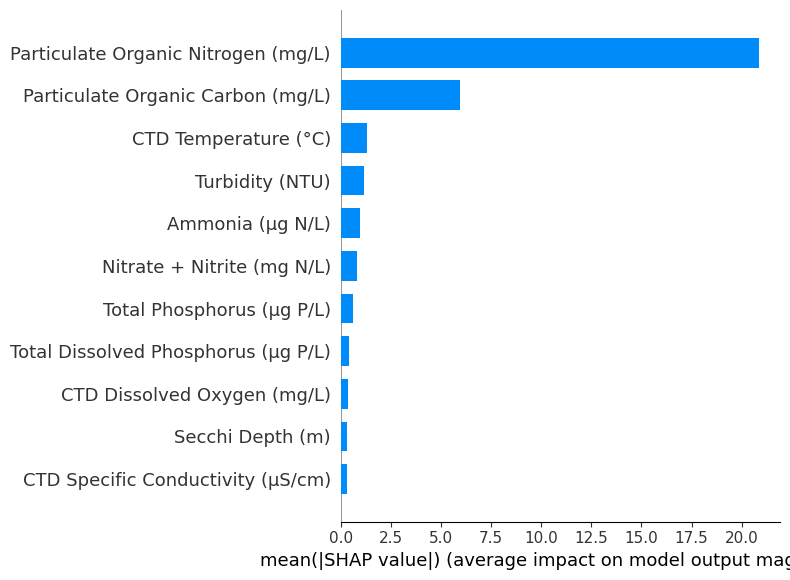

In [27]:
shap.summary_plot(shap_values, X_test,feature_names = features,plot_type="bar",show=False)